# Auto encoder, deep learning les 3

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.datasets import mnist

from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam


In [5]:
# Data inladen
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#
X_train = X_train.astype('float32') / 255.
X_train = X_train.reshape(X_train.shape + (1,))
    
X_test = X_test.astype('float32') / 255.
X_test = X_test.reshape(X_test.shape + (1,))
print(y_train.shape)
print(X_train.shape)

(60000,)
(60000, 28, 28, 1)


In [6]:
# 28x28 pixels en wordt geprojecteerd naar 2 nummers
input_dim = (28, 28, 1)
z_dim = 2

# Encoder

In [7]:
# Veranderd afbeelding naar de z_dim (2 dus)
encoder_input = Input(input_dim, name = 'encoder_input')

x = Conv2D(filters = 32,
           kernel_size = 3,
           padding = 'same',
           name = 'encoder_conv_1')(encoder_input)
x = LeakyReLU()(x)

x = Conv2D(filters = 64,
           kernel_size = 3,
           strides = (2,2),
           padding = 'same',
           name = 'encoder_conv_2')(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64,
           kernel_size = 3,
           strides = (2,2),
           padding = 'same',
           name = 'encoder_conv_3')(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64,
           kernel_size = 3,
           padding = 'same',
           name = 'encoder_conv_4')(x)
x = LeakyReLU()(x)

shape_before_flattening = K.int_shape(x)[1:]

x = Flatten()(x)

encoder_output = Dense(z_dim, name = 'encoder_output')(x)

encoder = Model(encoder_input, encoder_output)

# Decoder

In [8]:
# Van de z_dim terug naar afbeelding
decoder_input = Input((z_dim,), name = 'decoder_input')

x = Dense(np.prod(shape_before_flattening))(decoder_input)
x = Reshape(shape_before_flattening)(x) # van een dense vector naar de vorm van een afbeelding

x = Conv2DTranspose(filters = 64,
                kernel_size = 3,
                padding = 'same',
                name = 'decoder_conv_t_1')(x)
x = LeakyReLU()(x)

x = Conv2DTranspose(filters = 64,
                kernel_size = 3,
                strides = (2,2),
                padding = 'same',
                name = 'decoder_conv_t_2')(x)
x = LeakyReLU()(x)

x = Conv2DTranspose(filters = 32,
                kernel_size = 3,
                strides = (2,2),
                padding = 'same',
                name = 'decoder_conv_t_3')(x)
x = LeakyReLU()(x)

x = Conv2DTranspose(filters = 1,
                kernel_size = 3,
                padding = 'same',
                name = 'decoder_conv_t_4')(x)
x = LeakyReLU()(x)

decoder_output = Activation('sigmoid')(x)

decoder = Model(decoder_input, decoder_output)

In [9]:
# De auto encoder met MSE als loss
autoencoder = Model(encoder_input, decoder(encoder_output))

In [10]:
# Trainen
learning_rate = 0.0005

optimizer = Adam(lr = learning_rate)

def r_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred), axis = [1,2,3])

autoencoder.compile(optimizer = optimizer, loss = r_loss)

In [11]:
subset = 3000

autoencoder.fit(x = X_train[:subset], y = X_train[:subset], batch_size = 32, epochs = 20, shuffle = True)

Epoch 1/20
94/94 [==============================] - 11s 107ms/step - loss: 0.1888
Epoch 2/20
94/94 [==============================] - 10s 106ms/step - loss: 0.0689
Epoch 3/20
94/94 [==============================] - 10s 108ms/step - loss: 0.0582
Epoch 4/20
94/94 [==============================] - 10s 105ms/step - loss: 0.0568
Epoch 5/20
94/94 [==============================] - 10s 107ms/step - loss: 0.0551
Epoch 6/20
94/94 [==============================] - 10s 106ms/step - loss: 0.0544
Epoch 7/20
94/94 [==============================] - 10s 104ms/step - loss: 0.0543
Epoch 8/20
94/94 [==============================] - 10s 106ms/step - loss: 0.0532
Epoch 9/20
94/94 [==============================] - 10s 105ms/step - loss: 0.0540
Epoch 10/20
94/94 [==============================] - 10s 106ms/step - loss: 0.0529
Epoch 11/20
94/94 [==============================] - 10s 105ms/step - loss: 0.0523
Epoch 12/20
94/94 [==============================] - 10s 105ms/step - loss: 0.0517
Epoch 13/20
9

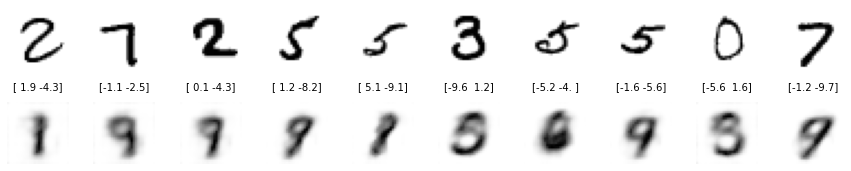

In [12]:
import matplotlib.pyplot as plt

n = 10

# selecteer willekeurige afbeeldingen
idX = np.random.choice(range(len(X_test)), n)
test_images = X_test[idX]

# door encoder naar nummer
z_points = encoder.predict(test_images)

# door decoder naar afbeelding
reconstr_images = decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot de afbeeldingen
for i in range(n):
    img = test_images[i].reshape((28,28))
    aX = fig.add_subplot(2, n, i + 1)
    aX.axis('off')
    aX.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=aX.transAxes)   
    aX.imshow(img, cmap='gray_r')
    
for i in range(n):
    img = reconstr_images[i].reshape((28,28))
    aX = fig.add_subplot(2, n, i + n + 1)
    aX.axis('off')
    aX.imshow(img, cmap='gray_r')

# De z-waarden plotten 

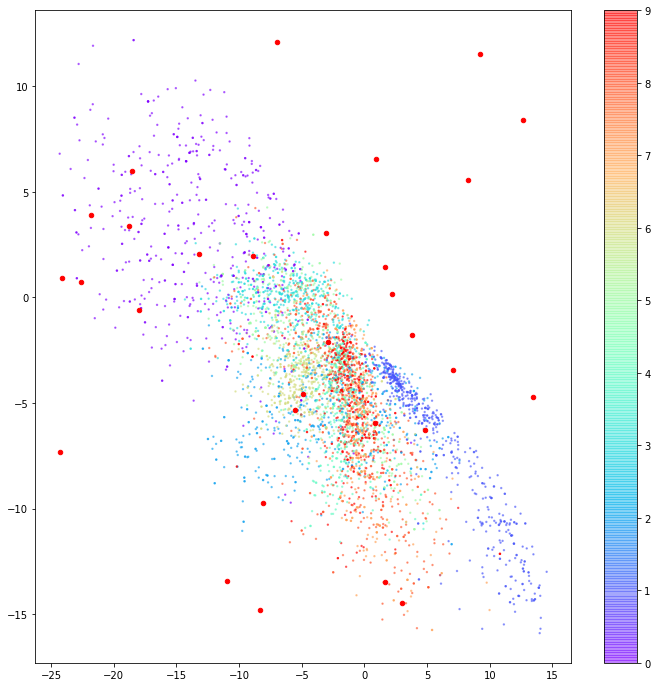

In [13]:
n = 5000
grid_size = 10
grid_depth = 3
figsize = 12

example_idx = np.random.choice(range(len(X_test)), n)
test_images = X_test[example_idx]
test_labels = y_test[example_idx]

z_points = encoder.predict(test_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize = (figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap = 'rainbow' , c = test_labels, alpha = 0.5, s = 2)
plt.colorbar()

# willekeurige punten voor de nieuwe afbeelding (rood)
x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

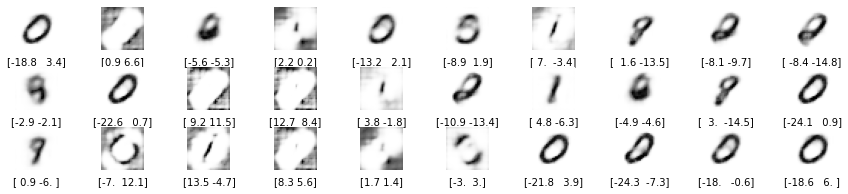

In [14]:
# De afbeeldingen na de decoder
reconst = decoder.predict(z_grid)

figsize = 15
fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')